https://www.pypandas.cn/

In [2]:
!pip install xlrd 

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [4]:
!pip install openpyxl

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------------ -------------------------- 81.9/250.0 kB 2.3 MB/s eta 0:00:01
     ---------------------------- --------- 184.3/250.0 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
pd.__version__

In [2]:
import pandas as pd
df = pd.read_excel("feed.xlsx")
#convert the date column to dateindex
# df.set_index('投喂时间',inplace=True)
df["投喂时间"] =  pd.to_datetime(df['投喂时间'])
#convert index to datetime
# df.index = pd.to_datetime(df.index)
df.head(10)

,投喂时间,池塘编号,品种名称,投喂方式,饲料仓库,投喂重量kg
0,2023-01-31,1127,散装料,自动投料机,1127,201.0
1,2023-01-31,1128,散装料,自动投料机,1128,211.0
2,2023-01-31,1129,散装料,自动投料机,1129,102.0
3,2023-01-31,1130,散装料,自动投料机,1130,218.0
4,2023-01-31,1201,散装料,自动投料机,1201,153.0
5,2023-01-31,1202,散装料,自动投料机,1202,170.0
6,2023-01-31,1203,散装料,自动投料机,1203,241.0
7,2023-01-31,1204,散装料,自动投料机,1204,210.0
8,2023-01-31,1205,散装料,自动投料机,1205,371.0
9,2023-01-31,1206,散装料,自动投料机,1206,401.0


In [3]:
df.tail()

,投喂时间,池塘编号,品种名称,投喂方式,饲料仓库,投喂重量kg
78427,2024-01-01,2320,散装料,自动投料机,2312,0.0
78428,2024-01-01,2321,散装料,自动投料机,2309,0.0
78429,2024-01-01,2322,散装料,自动投料机,2310,0.0
78430,2024-01-01,2323,散装料,自动投料机,2311,0.0
78431,2024-01-01,2324,散装料,自动投料机,2312,0.0


In [4]:
df['投喂重量kg'] = df['投喂重量kg'].astype(float)

In [9]:
df.dtypes

投喂时间      datetime64[ns]
池塘编号              object
品种名称              object
投喂方式              object
饲料仓库              object
投喂重量kg           float64
dtype: object

In [10]:
# 查看零值
(df['投喂重量kg'] != 0).sum()

47597

In [2]:
df.columns

Index(['投喂时间', '池塘编号', '品种名称', '投喂方式', '饲料仓库', '投喂重量kg'], dtype='object')

In [59]:
#删除存在零值的行
# df2 = df.drop(df.where(df['投喂重量kg']==0))
df2 = df[(df != 0).all(axis=1)]
#df 导出excel
df2.to_excel('feed1.xlsx',index=False)

In [11]:
df = pd.read_excel('feed1.xlsx')

In [12]:
df.shape

(47597, 6)

In [13]:
df['投喂时间'] = pd.to_datetime(df["投喂时间"])
# df_2023 = df_2023.set_index('投喂时间')

In [19]:
df_2023 = df[df["投喂时间"].dt.year == 2023]
df_2023.to_excel("df_2023.xlsx")

In [20]:
df_2023.shape

(44701, 6)

In [21]:
df_2023.tail()

,投喂时间,池塘编号,品种名称,投喂方式,饲料仓库,投喂重量kg
44696,2023-12-01,2318,散装料,自动投料机,2310,347.0
44697,2023-12-01,2319,散装料,自动投料机,2311,384.0
44698,2023-12-01,2320,散装料,自动投料机,2312,321.0
44699,2023-12-01,2323,散装料,自动投料机,2311,357.0
44700,2023-12-01,2324,散装料,自动投料机,2312,282.0


<Axes: xlabel='投喂时间'>

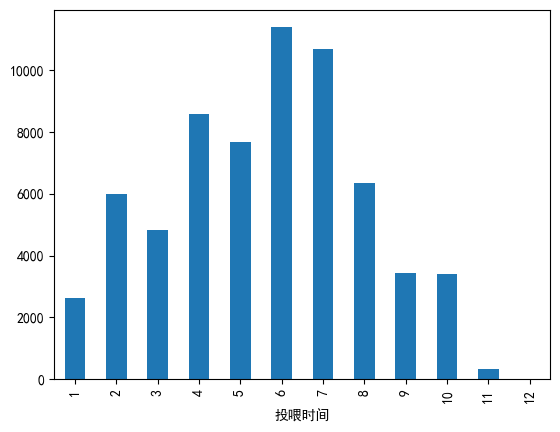

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
df3 = df_2023.where(df_2023["池塘编号"] == '1111').groupby(df_2023["投喂时间"].dt.month)
df3["投喂重量kg"].sum().plot(kind="bar")

In [6]:
df_2023.head()

,投喂时间,池塘编号,品种名称,投喂方式,饲料仓库,投喂重量kg
0,2023-01-31,1127,散装料,自动投料机,1127,201.0
1,2023-01-31,1128,散装料,自动投料机,1128,211.0
2,2023-01-31,1129,散装料,自动投料机,1129,102.0
3,2023-01-31,1130,散装料,自动投料机,1130,218.0
4,2023-01-31,1201,散装料,自动投料机,1201,153.0


In [31]:
df_2023['Date'] = pd.to_datetime(df_2023["投喂时间"])
df_2023 = df_2023.set_index('Date')

In [32]:
df_2023.shape

(47597, 6)

In [34]:
df_2023.to_excel("df_2003.xlsx")

In [37]:
df_2023.shape
df_2023.tail()

,投喂时间,池塘编号,品种名称,投喂方式,饲料仓库,投喂重量kg
Date,,,,,,
NaT,NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaT,NaN,NaN,NaN,NaN,NaN


IndexError: index 0 is out of bounds for axis 0 with size 0

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


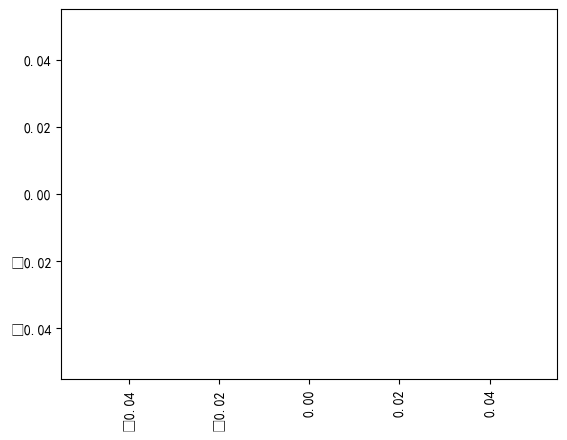

In [22]:
df3 = df_2023.where(df_2023["池塘编号"] == '1111').groupby(df["投喂时间"].dt.month)
df3["投喂重量kg"].mean().plot(kind="bar")

In [80]:
df_week = df_2023.groupby(['池塘编号', df_2023['投喂时间'].dt.strftime('%W')])['投喂重量kg'].mean()
#reset_index() 方法将索引变回普通列
df_week = df_week.reset_index()
# df_week.head()
df_week.to_excel('week.xlsx',index=True)

<Axes: xlabel='投喂时间'>

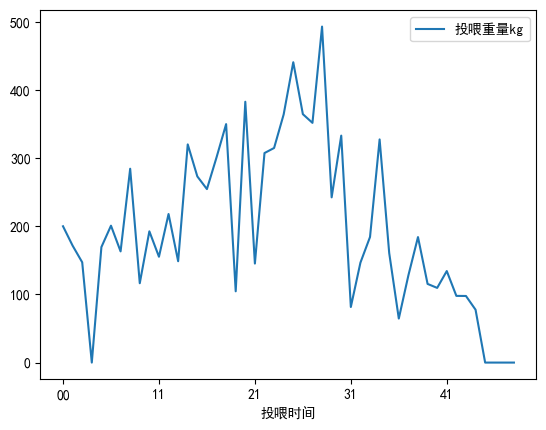

In [83]:
df_week.where(df_week["池塘编号"] == '1111').plot(x='投喂时间', y='投喂重量kg')

In [75]:
df_week.index

MultiIndex([('1111', '00'),
            ('1111', '01'),
            ('1111', '02'),
            ('1111', '04'),
            ('1111', '05'),
            ('1111', '06'),
            ('1111', '07'),
            ('1111', '08'),
            ('1111', '09'),
            ('1111', '10'),
            ...
            ('2422', '10'),
            ('2422', '11'),
            ('2422', '12'),
            ('2422', '13'),
            ('2424', '43'),
            ('2429', '10'),
            ('2429', '11'),
            ('2429', '12'),
            ('2430', '12'),
            ('2430', '13')],
           names=['池塘编号', '投喂时间'], length=10735)

<Axes: xlabel='投喂时间'>

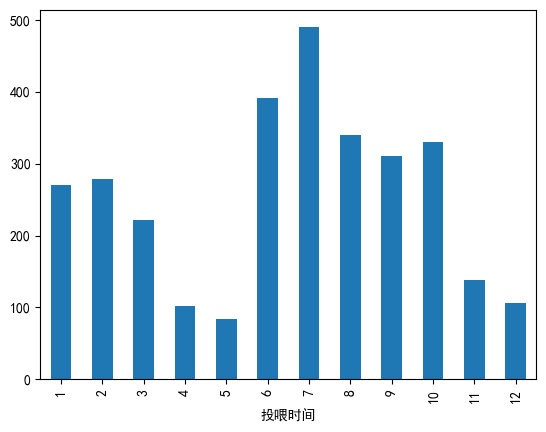

In [40]:
df4 = df_2023.where(df["池塘编号"] == '1127').groupby(df["投喂时间"].dt.month)
df4["投喂重量kg"].mean().plot(kind="bar")

In [35]:
df_2023.dtypes

投喂时间      datetime64[ns]
池塘编号              object
品种名称              object
投喂方式              object
饲料仓库              object
投喂重量kg           float64
dtype: object

In [36]:
df_2023.where((df_2023["池塘编号"] == '1111') & (df_2023["投喂时间"].dt.month == 11)).count()

投喂时间      30
池塘编号      30
品种名称      30
投喂方式      30
饲料仓库      30
投喂重量kg    30
dtype: int64

<Axes: xlabel='投喂时间'>

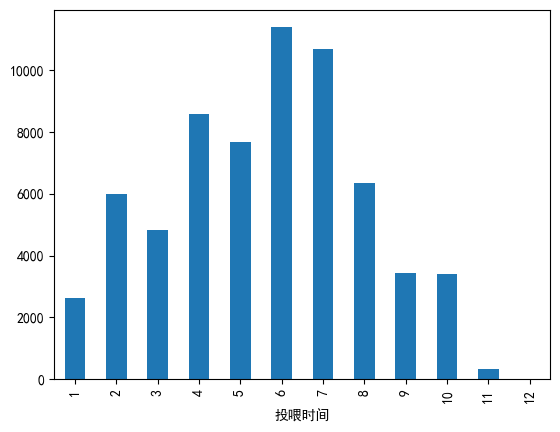

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
df1 = df.where(df["池塘编号"] == '1111').groupby(df["投喂时间"].dt.month)
df1["投喂重量kg"].sum().plot(kind="bar")

In [44]:
df.where(df["池塘编号"] == '1111').groupby(df["投喂时间"].dt.month).count()

,投喂时间,池塘编号,品种名称,投喂方式,饲料仓库,投喂重量kg
投喂时间,,,,,,
1,18,18,18,18,18,18
2,28,28,28,28,28,28
3,31,31,31,31,31,31
4,30,30,30,30,30,30
5,31,31,31,31,31,31
6,31,31,31,31,31,31
7,31,31,31,31,31,31
8,32,32,32,32,32,32
9,30,30,30,30,30,30


dtype('O')

In [69]:
pond_df = pd.read_excel("Pondstock.xlsx")
pond_df = pond_df[['池塘编号','品种名称','数量（斤）','均规格（斤/尾）','数量（尾）','结算年月']]
pond_df=pond_df[pond_df['数量（斤）'] != "0."]
# pond_df

pond_df.to_excel('fishstock.xlsx',index=False)

In [64]:
pond_df[pond_df['数量（斤）'] == "0"].count()

池塘编号        307
品种名称        307
数量（斤）       307
均规格（斤/尾）      0
数量（尾）       307
结算年月        307
dtype: int64

In [19]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [22]:
filtered_df.sort_index(axis=1, ascending=False).head(10)

,饲料仓库,池塘编号,投喂重量kg,投喂方式,品种名称
投喂时间,,,,,
2023-01-31 00:00:00,1111,1111,200.0,自动投料机,散装料
2023-01-30 00:00:00,1111,1111,0.0,自动投料机,散装料
2023-01-29 00:00:00,1111,1111,0.0,自动投料机,散装料
2023-01-15 00:00:00,1111,1111,146.0,自动投料机,散装料
2023-01-14 00:00:00,1111,1111,200.0,自动投料机,散装料
2023-01-13 00:00:00,1111,1111,200.0,自动投料机,散装料
2023-01-12 00:00:00,1111,1111,200.0,自动投料机,散装料
2023-01-11 00:00:00,1111,1111,83.0,自动投料机,散装料
2023-01-10 00:00:00,1111,1111,0.0,自动投料机,散装料


In [ ]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [29]:
filtered_df
# filtered_df.groupby(filtered_df['投喂时间'].dt.month).head()
# filtered_df.describe()


AttributeError: 'Index' object has no attribute 'dt'

In [ ]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [ ]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [ ]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [ ]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [ ]:
# df[df['池塘编号'] == '1111'].count()
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1]
# }
# df = pd.DataFrame(data)

# Filter rows based on a condition
filtered_df = df[df['池塘编号'] == '1111']
filtered_df.describe()
# filtered_df.plot()
# Plot the filtered data
# plt.plot(filtered_df['投喂时间'], filtered_df['投喂重量kg'])
# plt.xlabel('投喂时间')
# plt.ylabel('投喂重量kg')
# plt.title('Filtered Data Plot')
# plt.show()

,投喂重量kg
count,323.000000
mean,202.024768
std,153.826128
min,0.000000
25%,71.500000
50%,196.000000
75%,318.000000
max,570.000000


In [9]:
feed_df.head(5)

,投喂时间,池塘编号,投喂数量
1970-01-01 00:00:00.000000000,2023-01-31 00:00:00,1127,201.0
1970-01-01 00:00:00.000000001,2023-01-31 00:00:00,1128,211.0
1970-01-01 00:00:00.000000002,2023-01-31 00:00:00,1129,102.0
1970-01-01 00:00:00.000000003,2023-01-31 00:00:00,1130,218.0
1970-01-01 00:00:00.000000004,2023-01-31 00:00:00,1201,153.0


In [4]:
feed_df[feed_df['池塘编号'] == 1111].head()

,投喂时间,池塘编号,投喂数量


In [ ]:
feed_df.sort_values("池塘编号").groupby("池塘编号").sum('投喂数量')

In [ ]:
df.describe()

In [ ]:
df.sort_index(axis=1, ascending=False).head()

In [ ]:
df.dtypes

In [ ]:
df.index

In [ ]:
df['换算率'].unique()

In [ ]:
df2 = pd.read_excel("Pondstock.xlsx")
df2.head()

In [ ]:
df2.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df1 = df[['投喂时间','池塘编号','投喂重量kg']].sort_values('池塘编号', ascending=False)

In [ ]:
df1.head()